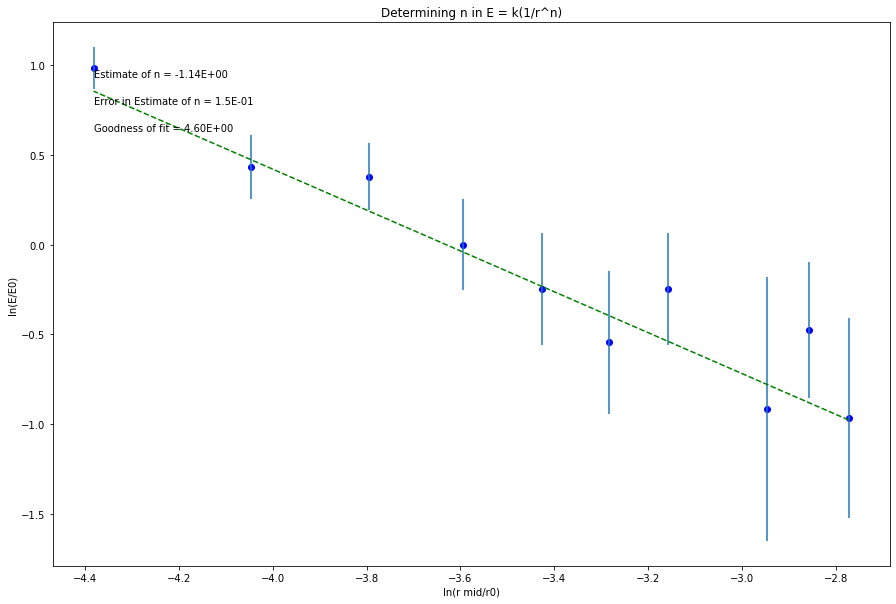

In [9]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
y_axis = np.array([-0.967584026,
-0.478035801,
-0.916290732,
-0.248461359,
-0.544727175,
-0.248461359,
0,
0.378436436,
0.431782416,
0.985816795
])
x_axis = np.array([-2.772588722,
-2.855970331,
-2.946942109,
-3.158251203,
-3.283414346,
-3.42651519,
-3.593569274,
-3.79423997,
-4.045554398,
-4.382026635
])


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_y = np.array([0.557838571,
0.378773447,
0.736938772,
0.313377653,
0.399896446,
0.313377653,
0.254475259,
0.185450642,
0.177493691,
0.116022757
])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = x_axis   #this should be the array you want to plot on the x axis
y = y_axis
dy = err_y  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln(r mid/r0)')
plt.ylabel('ln(E/E0)')
plt.title('Determining n in E = k(1/r^n)')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Estimate of n = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Estimate of n = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
